In [ ]:
!unzip /content/Dataset.zip

Archive:  /content/Dataset.zip
   creating: Dataset/
   creating: Dataset/benign/
  inflating: Dataset/benign/100.jpg  
  inflating: Dataset/benign/101.jpg  
  inflating: Dataset/benign/102.jpg  
  inflating: Dataset/benign/103.jpg  
  inflating: Dataset/benign/104.jpg  
  inflating: Dataset/benign/106.jpg  
  inflating: Dataset/benign/107.jpg  
  inflating: Dataset/benign/108.jpg  
  inflating: Dataset/benign/109.jpg  
  inflating: Dataset/benign/110.jpg  
  inflating: Dataset/benign/111.jpg  
  inflating: Dataset/benign/112.jpg  
  inflating: Dataset/benign/113.jpg  
  inflating: Dataset/benign/114.jpg  
  inflating: Dataset/benign/115.jpg  
  inflating: Dataset/benign/116.jpg  
  inflating: Dataset/benign/117.jpg  
  inflating: Dataset/benign/118.jpg  
  inflating: Dataset/benign/12.jpg   
  inflating: Dataset/benign/120.jpg  
  inflating: Dataset/benign/121.jpg  
  inflating: Dataset/benign/123.jpg  
  inflating: Dataset/benign/124.jpg  
  inflating: Dataset/benign/125.jpg  
  infl

In [ ]:
train_dir='/content/Dataset'
Labels = ['Benign', 'Malignant']
print ("class : ") 
for i in range(len(Labels)): 
    print (i, end = " ") 
    print (Labels[i])

class : 
0 Benign
1 Malignant


In [ ]:
IMAGE_SIZE

(224, 224)

In [ ]:
module_selection = ("mobilenet_v2", 224, 1280) 
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/2".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
BATCH_SIZE = 16 

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.2,
      fill_mode='nearest',
      validation_split=0.3)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    subset="training", 
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)
validation_generator = train_datagen.flow_from_directory(
    train_dir, 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    subset="validation",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 168 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [ ]:
feature_extractor = hub.KerasLayer(MODULE_HANDLE,input_shape=IMAGE_SIZE+(3,), output_shape=[FV_SIZE]  )

In [ ]:
do_fine_tuning = False #Enable Fine Tuning at a later point
if do_fine_tuning: #Slower Computation Time With this
  feature_extractor.trainable = True
  for layer in base_model.layers[-30:]: #make base_model
    layer.trainable =True
  
else:
  feature_extractor.trainable = False

In [ ]:
print("Currently Building Model with sequential method")
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax',
                           kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
#model.build((None,)+IMAGE_SIZE+(3,))

model.summary()

Currently Building Model with sequential method
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 flatten_3 (Flatten)         (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               655872    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 2,914,882
Trainable params: 656,898
Non-trainable params: 2,257,984
________________________________________________________

In [ ]:
LEARNING_RATE = 0.001 
model.compile(
   optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [ ]:
EPOCHS=15 #Intially Training with 15 Epochs
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/15
10/10 [==============================] - 14s 989ms/step - loss: 1.1416 - accuracy: 0.6125 - val_loss: 0.4926 - val_accuracy: 0.7812
Epoch 2/15
10/10 [==============================] - 10s 951ms/step - loss: 0.6778 - accuracy: 0.7105 - val_loss: 0.6302 - val_accuracy: 0.7344
Epoch 3/15
10/10 [==============================] - 10s 1s/step - loss: 0.3075 - accuracy: 0.8882 - val_loss: 0.3324 - val_accuracy: 0.8438
Epoch 4/15
10/10 [==============================] - 10s 1s/step - loss: 0.2871 - accuracy: 0.8816 - val_loss: 0.2008 - val_accuracy: 0.9062
Epoch 5/15
10/10 [==============================] - 9s 901ms/step - loss: 0.1950 - accuracy: 0.9276 - val_loss: 0.2611 - val_accuracy: 0.8906
Epoch 6/15
10/10 [==============================] - 9s 902ms/step - loss: 0.1765 - accuracy: 0.9474 - val_loss: 0.2520 - val_accuracy: 0.8906
Epoch 7/15
10/10 [==============================] - 10s 1s/step - loss: 0.1162 - accuracy: 0.9671 - val_loss: 0.2623 - val_accuracy: 0.8750
Epoch 8/15

1/1 [==============================] - 1s 755ms/step
class: Benign, confidence: 0.990547


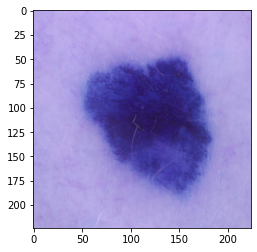

<Figure size 432x288 with 0 Axes>

1/1 [==============================] - 0s 81ms/step
class: Benign, confidence: 0.949145


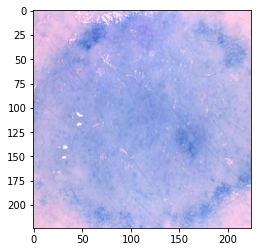

1/1 [==============================] - 0s 88ms/step
class: Benign, confidence: 0.949424


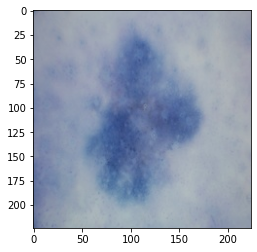

<Figure size 432x288 with 0 Axes>

1/1 [==============================] - 0s 87ms/step
class: Benign, confidence: 0.922415


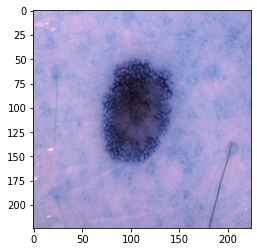

<Figure size 432x288 with 0 Axes>

1/1 [==============================] - 0s 85ms/step
class: Malignant, confidence: 0.917520


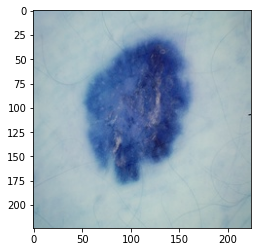

<Figure size 432x288 with 0 Axes>

In [ ]:
import random
import cv2
def upload(filename):
    img = cv2.imread(os.path.join(train_dir, filename))
    img = cv2.resize(img, (224, 224) )
    img = img /255
    
    return img

def pre_result(image):
    x = model.predict(np.asarray([img]))[0]
    classx = np.argmax(x)
    
    return {Labels[classx]: x[classx]}

images = random.sample(validation_generator.filenames, 5)

for idx, filename in enumerate(images):
    
    
    img = upload(filename)
    prediction = pre_result(img)
    print("class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)    
    plt.show()

In [ ]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))